In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

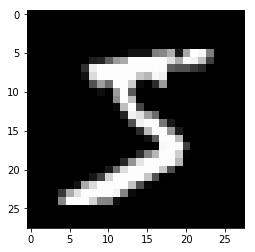

In [4]:
plt.imshow(X_train[0],cmap='gray')

In [5]:
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

In [6]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [9]:
y_train_cat.shape

(60000, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model=Sequential()
model.add(Dense(512,input_dim=28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
          

In [11]:
h=model.fit(X_train,y_train_cat,batch_size=128,epochs=3,verbose=1)

Epoch 1/3
60000/60000 [==============================] - 10s 170us/step - loss: 0.2275 - acc: 0.9299
Epoch 2/3
60000/60000 [==============================] - 10s 165us/step - loss: 0.0838 - acc: 0.9743
Epoch 3/3
60000/60000 [==============================] - 10s 162us/step - loss: 0.0559 - acc: 0.9829


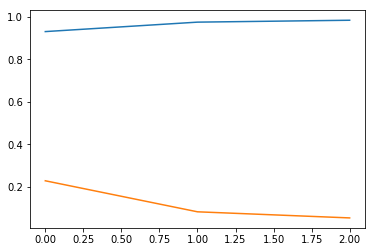

In [41]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])

In [43]:
test_accuracy=model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 72us/step


0.9792

In [44]:
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Convolution

In [13]:
from keras.layers import Conv2D

In [14]:
import cv2

In [17]:
img=cv2.imread('lena.jpg',0)

In [18]:
img.shape

(512, 512)

In [19]:
img_tensor=img.reshape((1,512,512,1))

In [20]:
model=Sequential()
model.add(Conv2D(1,(3,3),strides=(2,1),input_shape=(512,512,1)))
model.compile('adam','mse')

In [21]:
img_pred_tensor=model.predict(img_tensor)

In [41]:
img_pred=img_pred_tensor[0,:,:,0]

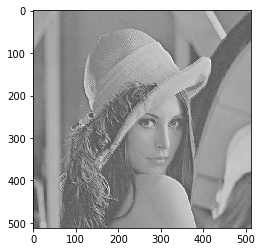

In [42]:
plt.imshow(img_pred,'gray')

In [25]:
weights=model.get_weights()

In [50]:
weights

[array([[[[1.]],
 
         [[1.]],
 
         [[1.]]],
 
 
        [[[1.]],
 
         [[1.]],
 
         [[1.]]],
 
 
        [[[1.]],
 
         [[1.]],
 
         [[1.]]]]), array([0.], dtype=float32)]

In [45]:
weights[0].shape  #3X3 filter,1 channel i/p 1 channel o/p

(3, 3, 1, 1)

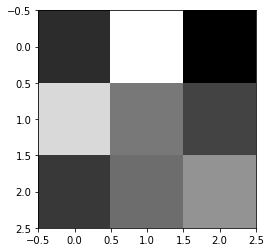

In [31]:
plt.imshow(weights[0][:,:,0,0],'gray')

In [32]:
weights[0]=np.ones(weights[0].shape)

In [33]:
model.set_weights(weights)

In [34]:
img_pred_tensor=model.predict(img_tensor)

In [35]:
img_pred=img_pred_tensor[0,:,:,0]

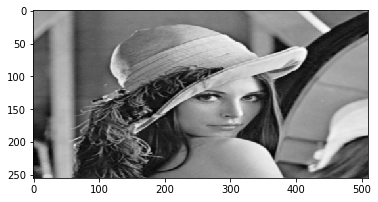

In [36]:
plt.imshow(img_pred,'gray')

In [37]:
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(512,512,1),padding='same'))
model.compile('adam','mse')

img_pred_tensor=model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)